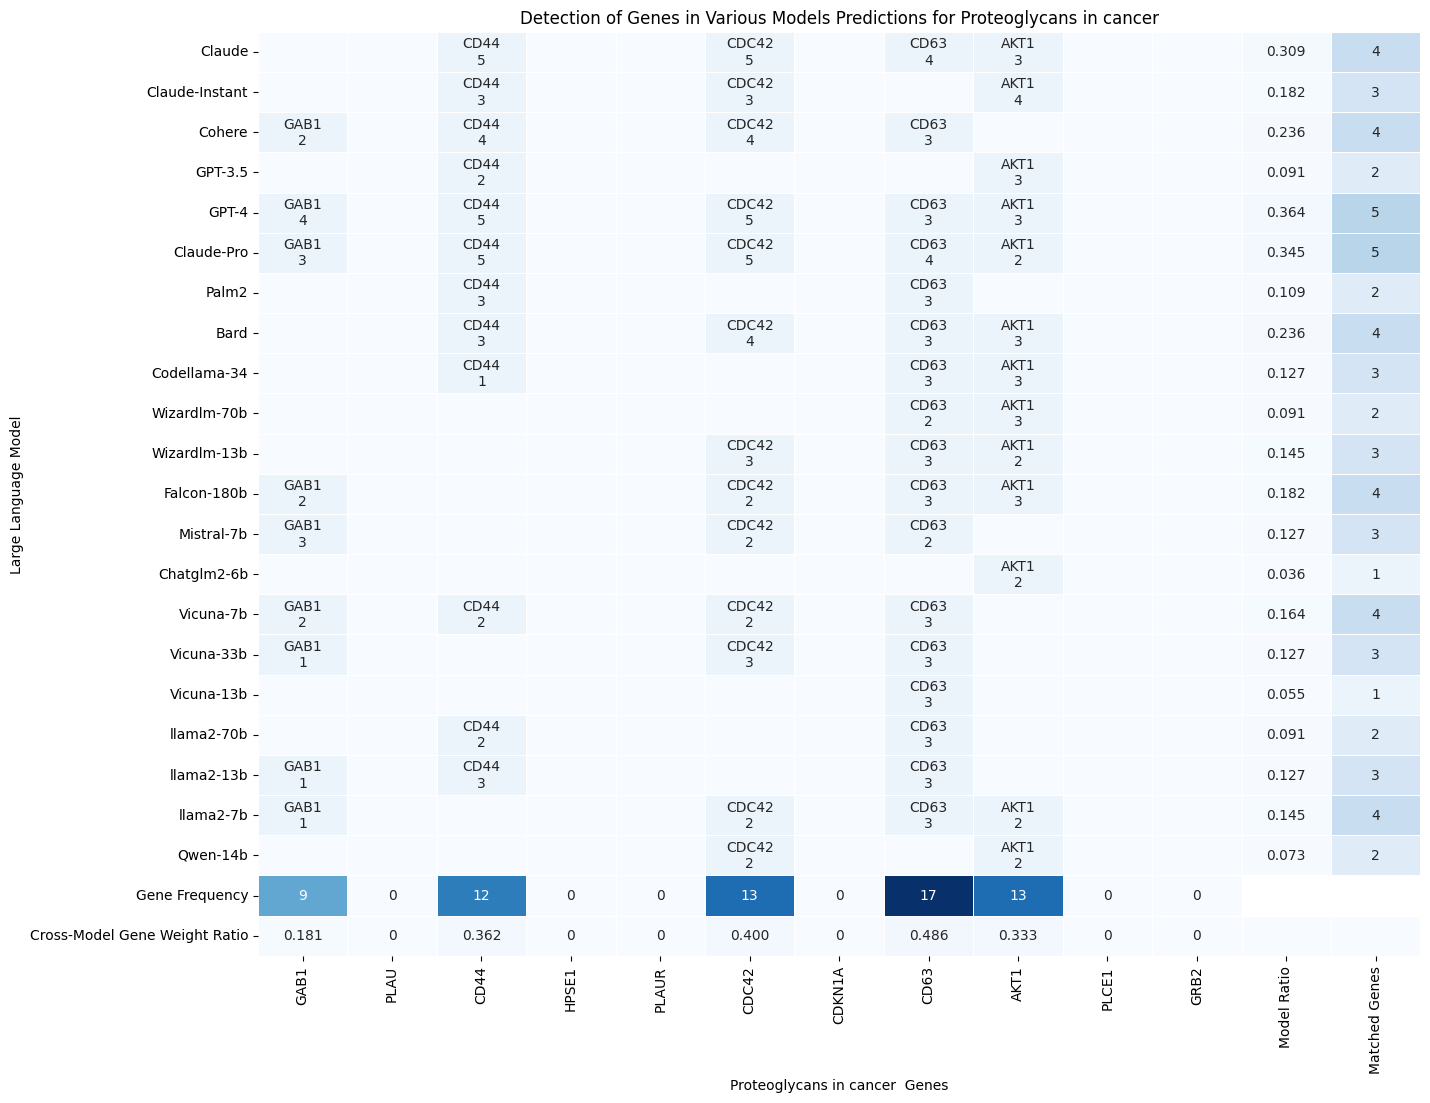

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


# The set of true genes
true_genes = set([
    'CD63', 'CDKN1A', 'PLAUR', 'CDC42', 'CD44', 'PLAU', 'GAB1', 'PLCE1', 'HPSE1', 'AKT1', 'GRB2'
])

# The predictions of various models for the second batch
models = {

    'Claude': ['CD63', 'DCN', 'CHSY1', 'CDC42', 'CD44', 'GPC3', 'BCAN', 'YLT1', 'HAS3', 'AKT1', 'TGB3'],
    'Claude-Instant': ['CSPG4', 'SDC4', 'HST3', 'CDC42', 'CD44', 'LT25D1', 'GPC', 'PRG4', 'YLT1', 'AKT1', 'GPC3'],
    'Cohere': ['CD63', 'PTX3', 'OLFM4', 'CDC42', 'CD44', 'LRP1', 'GAB1', 'VSIG4', 'ITGB5', 'PRG4', 'GFB1I1'],
    'GPT-3.5': ['EGFR', 'CDKN2A', 'PIK3CA', 'HIF1A', 'CD44', 'PAX3', 'VEGFA', 'WNT', 'TGFBR', 'AKT1', 'NF1'],
    'GPT-4': ['CD63', 'AGRN', 'ITGA2', 'CDC42', 'CD44', 'MMP9', 'GAB1', 'HSPG2', 'GPC1', 'AKT1', 'EXT2'],
    'Claude-Pro': ['CD63', 'CHSY3', 'CHST11', 'CDC42', 'CD44', 'NDST1', 'GAB1', 'EXT1', 'SULF1', 'AKT1', 'HSY3'],
    'Palm2': ['CD63', 'ADAMA', 'TGFB1', 'MMP2', 'CD44', 'TGF', 'WNTB', 'WNT3A', 'RAS', 'SPO1', 'CTGF'],
    'Bard': ['CD63', 'VCAM', 'NCAM', 'CDC42', 'CD44', 'PLU', 'HYAL', 'HS33', 'GPC3', 'AKT1', 'GPC1'],
    'Codellama-34': ['CD63', 'PIK3CA', 'HIF1A', 'CD44', 'CD44', 'PAX3', 'VEGFA', 'WNT', 'TGFBR', 'AKT1', 'ABC'],
    'Wizardlm-70b': ['CD63', 'Abc', 'XYZ', 'MMP9', 'HSPG2', 'GPC1', 'HSPG2', 'ITGB5', 'PRG4', 'AKT1', 'GFB1I1'],
    'Wizardlm-13b': ['CD63', 'PLU', 'HYAL', 'CDC42', 'PLU', 'HYAL', 'HS33', 'GPC3', 'PLU', 'AKT1', 'Xyz'],
    'Falcon-180b': ['CD63', 'ADAMA', 'TGFB1', 'CDC42', 'EXT1', 'SULF1', 'GAB1', 'EXT1', 'SULF1', 'AKT1', 'Abc'],
    'Mistral-7b': ['CD63', 'ADAMA', 'TGFB1', 'CDC42', 'CD', 'GAB1', 'EXT1', 'SULF1', 'GAB1', 'ABC', 'Xyz'],
    'Chatglm2-6b': ['EGFR', 'CDKN2A', 'PIK3CA', 'HIF1A', 'CD4', 'PAX3', 'VEGFA', 'WNT', 'TGFBR', 'AKT1', 'ABC'],
    'Vicuna-7b': ['CD63', 'ADAMA', 'TGFB1', 'CDC42', 'CD44', 'SULF1', 'GAB1', 'EXT1', 'SULF1', 'SPO1', 'CTGF'],
    'Vicuna-33b': ['CD63', 'ADAMA', 'TGFB1', 'CDC42', 'CD4', 'GAB1', 'EXT1', 'SULF1', 'GAB1', 'AK1', 'Xyz'],
    'Vicuna-13b': ['CD63', 'CDKN2A', 'PIK3CA', 'HIF1A', 'CD4', 'HYAL', 'HS33', 'GPC3', 'PLU', 'AT1', 'Xyz'],
    'llama2-70b': ['CD63', 'ADAMA', 'TGFB1', 'CDC2', 'CD44', 'LT25D1', 'GPC', 'PRG4', 'YLT1', 'AKT', 'SULF1'],
    'llama2-13b': ['CD63', 'ADAMA', 'TGFB1', 'CDC2', 'CD44', 'SULF1', 'GAB1', 'EXT1', 'SULF1', 'AK1', 'CTGF'],
    'llama2-7b': ['CD63', 'ADAMA', 'TGFB1', 'CDC42', 'CD4', 'T25D', 'GAB1', 'GPC', 'PRG4', 'AKT1', 'SULF'],
    'Qwen-14b': ['D63', 'ADAMA', 'TGFB1', 'CDC42', 'PAX3', 'VEGFA', 'WNT', 'TGFBR', 'AKT1', 'NF1', 'PAX3'],
}


weights_data = {

    "Claude": [4, 0, 0, 5, 5, 0, 0, 0, 0, 3, 0],
    "Claude-Instant": [4, 0, 0, 3, 3, 0, 0, 0, 0, 4, 0],
    "Cohere": [3, 0, 0, 4, 4, 0, 2, 0, 0, 0, 0],
    "GPT-3.5": [0, 0, 0, 2, 2, 0, 0, 0, 0, 3, 0],
    "GPT-4": [3, 0, 0, 5, 5, 0, 4, 0, 0, 3, 0],
    "Claude-Pro": [4, 0, 0, 5, 5, 0, 3, 0, 0, 2, 0],
    "Palm2": [3, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0],
    "Bard": [3, 0, 0, 4, 3, 0, 0, 0, 0, 3, 0],
    "Codellama-34": [3, 0, 0, 1, 2, 0, 0, 0, 0, 3, 0],
    "Wizardlm-70b": [2, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0],
    "Wizardlm-13b": [3, 0, 0, 3, 0, 0, 0, 0, 0, 2, 0],
    "Falcon-180b": [3, 0, 0, 2, 0, 0, 2, 0, 0, 3, 0],
    "Mistral-7b": [2, 0, 0, 2, 0, 3, 0, 0, 0, 0, 0],
    "Chatglm2-6b": [0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0],
    "Vicuna-7b": [3, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0],
    "Vicuna-33b": [3, 0, 0, 3, 0, 1, 0, 0, 2, 0, 0],
    "Vicuna-13b": [3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # Note: Missing weights from your table
    "llama2-70b": [3, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0], # Note: Missing weights from your table
    "llama2-13b": [3, 0, 0, 0, 3, 0, 1, 0, 0, 0, 0], # Note: Missing weights from your table
    "llama2-7b": [3, 0, 0, 2, 0, 0, 1, 0, 0, 2, 0],
    "Qwen-14b": [0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0],
}

# Constants
total_genes = 11
scaling_factor = 5
total_models = 21

# Initialize data and annotation dictionaries
data = {'Model': list(models.keys())}
annotation = {'Model': list(models.keys())}
normalized_scores = []  # To store normalized gene match scores for each model

# Initialize sum of weights for each gene
sum_weights_all_genes = {gene: 0 for gene in true_genes}

# Populate the data and annotation dictionaries
for gene in true_genes:
    data[gene] = []
    annotation[gene] = []

for model, predictions in models.items():
    sum_matched_gene_weights = 0  # Initialize sum of weights for this model
    for gene in true_genes:
        if gene in predictions:
            weight = weights_data[model][predictions.index(gene)]
            sum_matched_gene_weights += weight  # Add weight to the sum
            sum_weights_all_genes[gene] += weight  # Add to total sum for each gene
            data[gene].append(1)
            annotation[gene].append(f"{gene}\n{weight:.0f}")
        else:
            data[gene].append(0)
            annotation[gene].append("")

    normalized_score = round(sum_matched_gene_weights / (total_genes * scaling_factor), 3)
    normalized_scores.append(normalized_score)

# Create DataFrames from the dictionaries
df = pd.DataFrame(data).set_index('Model')
annotation_df = pd.DataFrame(annotation).set_index('Model')

df['Model Ratio'] = normalized_scores
annotation_df['Model Ratio'] = normalized_scores

annotation_df["Matched Genes"] = df.drop("Model Ratio", axis=1).sum(axis=1).astype(int)
df["Matched Genes"] = df.drop("Model Ratio", axis=1).sum(axis=1).astype(int)

gene_frequency = df.drop(["Matched Genes", "Model Ratio"], axis=1).sum()
df.loc['Gene Frequency'] = gene_frequency
annotation_df.loc['Gene Frequency'] = gene_frequency.apply(lambda x: f"\n{x}")

# Calculate and Add Cross-Model Gene Weight Ratio as a new row
cross_model_gene_weight_ratios = {gene: sum_weights_all_genes[gene] / (total_models * 5) for gene in true_genes}
df.loc['Cross-Model Gene Weight Ratio'] = df.columns.map(cross_model_gene_weight_ratios).fillna(0)
annotation_df.loc['Cross-Model Gene Weight Ratio'] = df.loc['Cross-Model Gene Weight Ratio'].apply(lambda x: f"{x:.3f}")

# Exclude the last two columns from the Cross-Model Gene Weight Ratio calculation
df.loc['Cross-Model Gene Weight Ratio', ['Model Ratio', 'Matched Genes']] = 0
annotation_df.loc['Cross-Model Gene Weight Ratio', ['Model Ratio', 'Matched Genes']] = ""

# Custom annotation formatting
def custom_annot(val):
    if pd.isna(val):
        return ""
    try:
        # Check if the value is an integer
        if float(val).is_integer():
            return f"{int(float(val))}"
        return f"{float(val):.3f}"
    except ValueError:
        return val

annot_custom = annotation_df.applymap(custom_annot)

# Plotting the heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(df, cmap="Blues", cbar=False, linewidths=.5, annot=annot_custom.values, fmt='s')

plt.title('Detection of Genes in Various Models Predictions for Proteoglycans in cancer')
plt.xlabel('Proteoglycans in cancer  Genes')
plt.ylabel('Large Language Model')

# Adjust the alignment of x-axis tick labels (gene names)
#plt.xticks(rotation=0.1, ha='Right')  # Rotate the gene names upwards and align them to the right

plt.xticks(rotation=90, ha='center')  # Rotate the gene names vertically

plt.show()

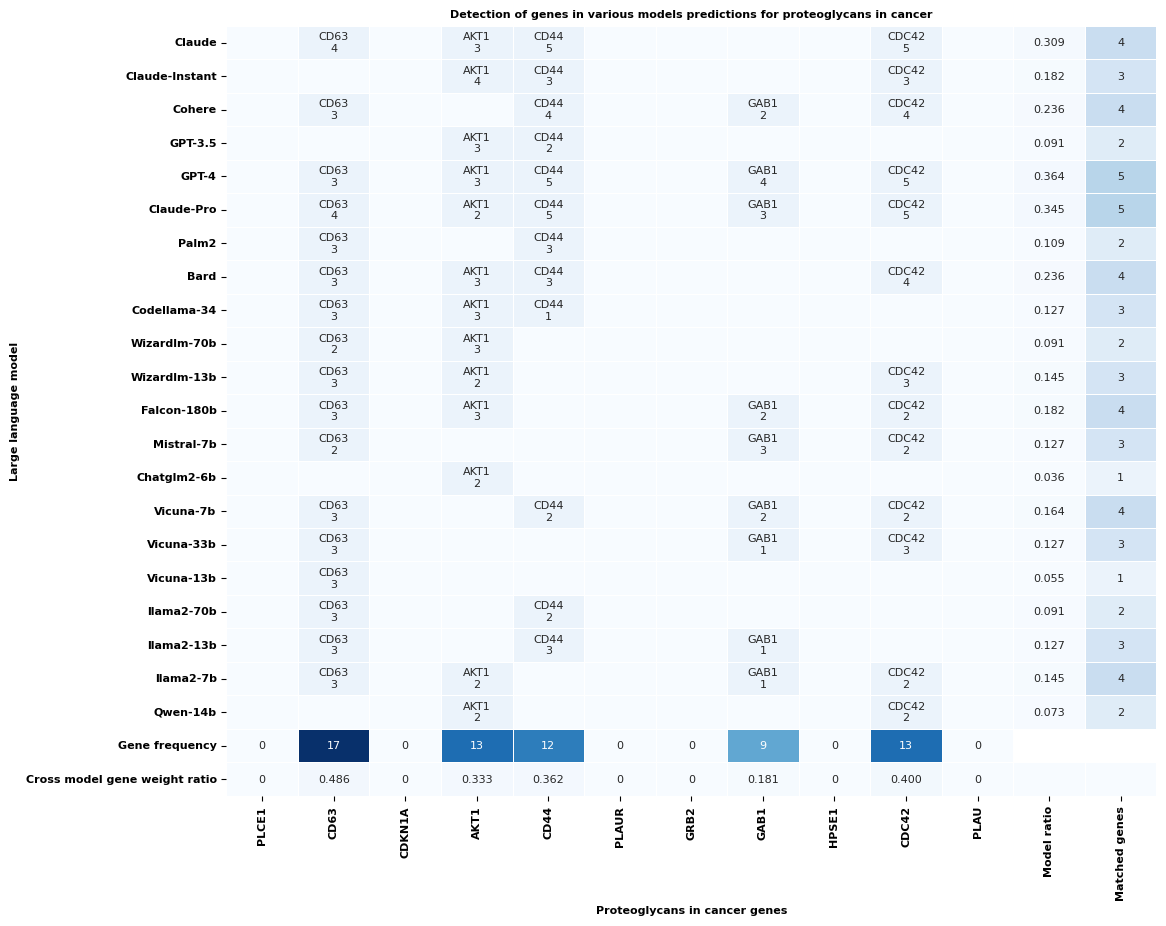

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

# The set of true genes
true_genes = set([
    'CD63', 'CDKN1A', 'PLAUR', 'CDC42', 'CD44', 'PLAU', 'GAB1', 'PLCE1', 'HPSE1', 'AKT1', 'GRB2'
])

# The predictions of various models for the second batch
models = {

    'Claude': ['CD63', 'DCN', 'CHSY1', 'CDC42', 'CD44', 'GPC3', 'BCAN', 'YLT1', 'HAS3', 'AKT1', 'TGB3'],
    'Claude-Instant': ['CSPG4', 'SDC4', 'HST3', 'CDC42', 'CD44', 'LT25D1', 'GPC', 'PRG4', 'YLT1', 'AKT1', 'GPC3'],
    'Cohere': ['CD63', 'PTX3', 'OLFM4', 'CDC42', 'CD44', 'LRP1', 'GAB1', 'VSIG4', 'ITGB5', 'PRG4', 'GFB1I1'],
    'GPT-3.5': ['EGFR', 'CDKN2A', 'PIK3CA', 'HIF1A', 'CD44', 'PAX3', 'VEGFA', 'WNT', 'TGFBR', 'AKT1', 'NF1'],
    'GPT-4': ['CD63', 'AGRN', 'ITGA2', 'CDC42', 'CD44', 'MMP9', 'GAB1', 'HSPG2', 'GPC1', 'AKT1', 'EXT2'],
    'Claude-Pro': ['CD63', 'CHSY3', 'CHST11', 'CDC42', 'CD44', 'NDST1', 'GAB1', 'EXT1', 'SULF1', 'AKT1', 'HSY3'],
    'Palm2': ['CD63', 'ADAMA', 'TGFB1', 'MMP2', 'CD44', 'TGF', 'WNTB', 'WNT3A', 'RAS', 'SPO1', 'CTGF'],
    'Bard': ['CD63', 'VCAM', 'NCAM', 'CDC42', 'CD44', 'PLU', 'HYAL', 'HS33', 'GPC3', 'AKT1', 'GPC1'],
    'Codellama-34': ['CD63', 'PIK3CA', 'HIF1A', 'CD44', 'CD44', 'PAX3', 'VEGFA', 'WNT', 'TGFBR', 'AKT1', 'ABC'],
    'Wizardlm-70b': ['CD63', 'Abc', 'XYZ', 'MMP9', 'HSPG2', 'GPC1', 'HSPG2', 'ITGB5', 'PRG4', 'AKT1', 'GFB1I1'],
    'Wizardlm-13b': ['CD63', 'PLU', 'HYAL', 'CDC42', 'PLU', 'HYAL', 'HS33', 'GPC3', 'PLU', 'AKT1', 'Xyz'],
    'Falcon-180b': ['CD63', 'ADAMA', 'TGFB1', 'CDC42', 'EXT1', 'SULF1', 'GAB1', 'EXT1', 'SULF1', 'AKT1', 'Abc'],
    'Mistral-7b': ['CD63', 'ADAMA', 'TGFB1', 'CDC42', 'CD', 'GAB1', 'EXT1', 'SULF1', 'GAB1', 'ABC', 'Xyz'],
    'Chatglm2-6b': ['EGFR', 'CDKN2A', 'PIK3CA', 'HIF1A', 'CD4', 'PAX3', 'VEGFA', 'WNT', 'TGFBR', 'AKT1', 'ABC'],
    'Vicuna-7b': ['CD63', 'ADAMA', 'TGFB1', 'CDC42', 'CD44', 'SULF1', 'GAB1', 'EXT1', 'SULF1', 'SPO1', 'CTGF'],
    'Vicuna-33b': ['CD63', 'ADAMA', 'TGFB1', 'CDC42', 'CD4', 'GAB1', 'EXT1', 'SULF1', 'GAB1', 'AK1', 'Xyz'],
    'Vicuna-13b': ['CD63', 'CDKN2A', 'PIK3CA', 'HIF1A', 'CD4', 'HYAL', 'HS33', 'GPC3', 'PLU', 'AT1', 'Xyz'],
    'llama2-70b': ['CD63', 'ADAMA', 'TGFB1', 'CDC2', 'CD44', 'LT25D1', 'GPC', 'PRG4', 'YLT1', 'AKT', 'SULF1'],
    'llama2-13b': ['CD63', 'ADAMA', 'TGFB1', 'CDC2', 'CD44', 'SULF1', 'GAB1', 'EXT1', 'SULF1', 'AK1', 'CTGF'],
    'llama2-7b': ['CD63', 'ADAMA', 'TGFB1', 'CDC42', 'CD4', 'T25D', 'GAB1', 'GPC', 'PRG4', 'AKT1', 'SULF'],
    'Qwen-14b': ['D63', 'ADAMA', 'TGFB1', 'CDC42', 'PAX3', 'VEGFA', 'WNT', 'TGFBR', 'AKT1', 'NF1', 'PAX3'],
}


weights_data = {

    "Claude": [4, 0, 0, 5, 5, 0, 0, 0, 0, 3, 0],
    "Claude-Instant": [4, 0, 0, 3, 3, 0, 0, 0, 0, 4, 0],
    "Cohere": [3, 0, 0, 4, 4, 0, 2, 0, 0, 0, 0],
    "GPT-3.5": [0, 0, 0, 2, 2, 0, 0, 0, 0, 3, 0],
    "GPT-4": [3, 0, 0, 5, 5, 0, 4, 0, 0, 3, 0],
    "Claude-Pro": [4, 0, 0, 5, 5, 0, 3, 0, 0, 2, 0],
    "Palm2": [3, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0],
    "Bard": [3, 0, 0, 4, 3, 0, 0, 0, 0, 3, 0],
    "Codellama-34": [3, 0, 0, 1, 2, 0, 0, 0, 0, 3, 0],
    "Wizardlm-70b": [2, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0],
    "Wizardlm-13b": [3, 0, 0, 3, 0, 0, 0, 0, 0, 2, 0],
    "Falcon-180b": [3, 0, 0, 2, 0, 0, 2, 0, 0, 3, 0],
    "Mistral-7b": [2, 0, 0, 2, 0, 3, 0, 0, 0, 0, 0],
    "Chatglm2-6b": [0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0],
    "Vicuna-7b": [3, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0],
    "Vicuna-33b": [3, 0, 0, 3, 0, 1, 0, 0, 2, 0, 0],
    "Vicuna-13b": [3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # Note: Missing weights from your table
    "llama2-70b": [3, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0], # Note: Missing weights from your table
    "llama2-13b": [3, 0, 0, 0, 3, 0, 1, 0, 0, 0, 0], # Note: Missing weights from your table
    "llama2-7b": [3, 0, 0, 2, 0, 0, 1, 0, 0, 2, 0],
    "Qwen-14b": [0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0],
}

# Constants
total_genes = 11
scaling_factor = 5
total_models = 21

# Initialize data and annotation dictionaries
data = {'Model': list(models.keys())}
annotation = {'Model': list(models.keys())}
normalized_scores = []  # To store normalized gene match scores for each model

# Initialize sum of weights for each gene
sum_weights_all_genes = {gene: 0 for gene in true_genes}

# Populate the data and annotation dictionaries
for gene in true_genes:
    data[gene] = []
    annotation[gene] = []

for model, predictions in models.items():
    sum_matched_gene_weights = 0  # Initialize sum of weights for this model
    for gene in true_genes:
        if gene in predictions:
            weight = weights_data[model][predictions.index(gene)]
            sum_matched_gene_weights += weight  # Add weight to the sum
            sum_weights_all_genes[gene] += weight  # Add to total sum for each gene
            data[gene].append(1)
            annotation[gene].append(f"{gene}\n{weight:.0f}")
        else:
            data[gene].append(0)
            annotation[gene].append("")

    normalized_score = round(sum_matched_gene_weights / (total_genes * scaling_factor), 3)
    normalized_scores.append(normalized_score)

# Create DataFrames from the dictionaries
df = pd.DataFrame(data).set_index('Model')
annotation_df = pd.DataFrame(annotation).set_index('Model')

df['Model ratio'] = normalized_scores
annotation_df['Model ratio'] = normalized_scores

annotation_df["Matched genes"] = df.drop("Model ratio", axis=1).sum(axis=1).astype(int)
df["Matched genes"] = df.drop("Model ratio", axis=1).sum(axis=1).astype(int)

gene_frequency = df.drop(["Matched genes", "Model ratio"], axis=1).sum()
df.loc['Gene frequency'] = gene_frequency
annotation_df.loc['Gene requency'] = gene_frequency.apply(lambda x: f"\n{x}")

# Calculate and Add Cross-Model Gene Weight Ratio as a new row
cross_model_gene_weight_ratios = {gene: sum_weights_all_genes[gene] / (total_models * 5) for gene in true_genes}
df.loc['Cross model gene weight ratio'] = df.columns.map(cross_model_gene_weight_ratios).fillna(0)
annotation_df.loc['Cross model gene weight ratio'] = df.loc['Cross model gene weight ratio'].apply(lambda x: f"{x:.3f}")

# Exclude the last two columns from the Cross-Model Gene Weight Ratio calculation
df.loc['Cross model gene weight ratio', ['Model ratio', 'Matched genes']] = 0
annotation_df.loc['Cross model gene weight ratio', ['Model ratio', 'Matched genes']] = ""

# Custom annotation formatting
def custom_annot(val):
    if pd.isna(val):
        return ""
    try:
        # Check if the value is an integer
        if float(val).is_integer():
            return f"{int(float(val))}"
        return f"{float(val):.3f}"
    except ValueError:
        return val

annot_custom = annotation_df.applymap(custom_annot)

# Plotting the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df, cmap="Blues", cbar=False, linewidths=.5, annot=annot_custom.values, fmt='s', annot_kws={"fontsize": 8, "fontname": "DejaVu Sans"})

plt.title('Detection of genes in various models predictions for proteoglycans in cancer', fontsize=8, fontname='DejaVu Sans', weight='bold')
plt.xlabel('Proteoglycans in cancer genes', fontsize=8, fontname='DejaVu Sans', weight='bold')
plt.ylabel('Large language model', fontsize=8, fontname='DejaVu Sans', weight='bold')

# Adjust the alignment of x-axis tick labels (gene names)
plt.xticks(rotation=90, ha='center', fontsize=8, fontname='DejaVu Sans', weight='bold')  # Rotate the gene names vertically
plt.yticks(fontsize=8, fontname='DejaVu Sans', weight='bold')

# Save the figure with specified resolution and color mode
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight', format='png')

plt.show()
